### Tracing test

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

In [7]:
Q = 100
npor = 0.3
k = 10
H = 10
T = k * H
Ss = 1e-4
S = Ss * H
ml = ModelMaq(kaq=[k], z=[H, 0], Saq=[Ss], tmin=1, tmax=100, M=10)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, Q)])
ml.solve()

self.neq  1
solution complete


In [18]:
timtrace = timtraceline(ml, 50, 50, 0, tstart=1, delt=1, nstep=50)

no message


\begin{equation}
Q_r = -T\frac{\partial h}{\partial r} = -T\frac{\text{d} h}{\text{d} u}\frac{\partial u}{\partial r} = -\frac{Q}{2\pi} \frac{1}{r}\exp(-u)
\end{equation}
\begin{equation}
u =  \frac{S r^2}{4T(t-t_0)}
\end{equation}

In [10]:
def vxytheis(t, xy):
    x, y = xy
    r = np.sqrt(x ** 2 + y ** 2)
    u = S * r ** 2 / (4 * T * t)
    Qr = -Q / (2 * np.pi) / r * np.exp(-u)
    vr = Qr / (H * npor)
    vx = vr * x / r
    vy = vr * y / r
    return np.array([vx, vy])

In [11]:
from scipy.integrate import solve_ivp
t = np.arange(1, 52)
path0 = solve_ivp(vxytheis, (1, 51), y0=[50, 50], t_eval=t)

Text(0, 0.5, 'x')

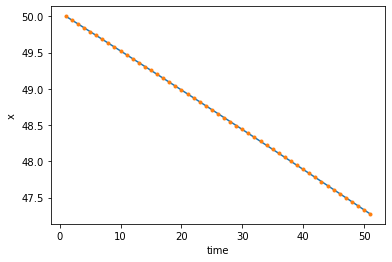

In [24]:
plt.plot(t, path0.y[0])
plt.plot(t, timtrace['trace'][:, 0], '.')
plt.xlabel('time')
plt.ylabel('x')